## Altoros.com's KMeans-style clustering example, modified to use TensorFlow v.2

Source: [https://www.altoros.com/blog/using-k-means-clustering-in-tensorflow/](https://www.altoros.com/blog/using-k-means-clustering-in-tensorflow/)

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

In [12]:
points_n = 1000
clusters_n = 3
iteration_n =  100

points = tf.constant(np.random.uniform(
  0, 10, (points_n, 2)))                  # shape: (1000, 2)
'''
numpy.random.uniform(low=0.0, high=1.0, size=None)
size: int or tuple of ints, optional
Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. 
If size is None (default), a single value is returned if low and high are both scalars. 
Otherwise, np.broadcast(low, high).size samples are drawn.
'''
# For centroids, choose 3 of the points, selected at random, then
# cluster the other points around them. 
centroids = tf.Variable(tf.slice(tf.random.shuffle(points), [0, 0], 
  [clusters_n, -1]))

points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

distances = tf.reduce_sum(
  tf.square(tf.subtract(points_expanded, centroids_expanded)), 2
)
assignments = tf.argmin(distances, 0)

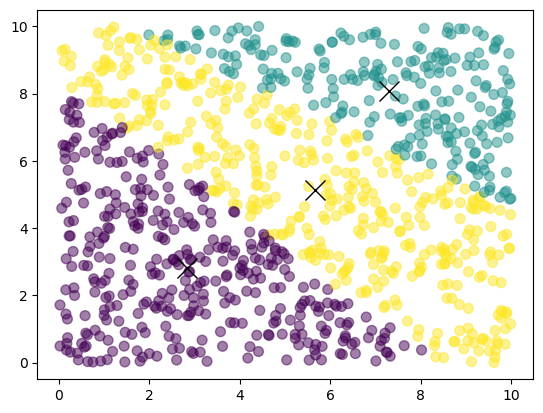

In [13]:
means = []
for c in range(clusters_n):
  means.append(
    tf.reduce_mean(
      tf.gather(
        points, tf.reshape(tf.where(tf.equal(assignments, c) ), [1,-1]
        )
      ),axis=1
    )
  )

new_centroids = tf.concat(means, 0)

update_centroids = centroids.assign(new_centroids)

for step in range(iteration_n):
  [_, centroid_values, points_values, assignment_values] = \
    [update_centroids, centroids, points, assignments]

plt.scatter(points_values[:, 0], points_values[:, 1], 
  c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 
  'kx', markersize=15)
plt.show()
